# Helmholtz Coil Calibration Data Analysis

The goal here is to obtain as accurate a value of $dB/dI$ (in $\mu T/\mathrm{amp}$) for each of our three Helmholtz Coils. 

In [1]:
# setup cell: import libraries, set plot styles, etc...
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['ytick.major.pad'] = 10
plt.rc("xtick", direction="in")
plt.rc("ytick", direction="in")
## choose inline for plots in the notebook 
## choose tk for plots external to the notebook
%matplotlib inline
#%matplotlib tk
plt.rcParams['figure.figsize'] = (12,9)

Enter the File Name and number of bField sensors.  Then edit the np.loadtxt command appropriately to correctly identify the data columns. Make sure to edit the title to reflect which axis this plot is for.

## Z axis coils (Circular)

In [2]:
fileName = 'Bz-2015-Sep-22-100Hz.csv'

In [3]:
def ComputeCalibration(fileName, savePNG=True):
    numSensors = 3
    t, current, b1, b2, b3 = np.loadtxt(fileName, delimiter=',', usecols=(0,1,2,3,4), unpack=True, skiprows=1)
    plot_title = "Magnetic Field Calibration : " + fileName   # makes sure that datafile name is part of plot title.
    bAverage = np.abs(1000.*(b1+b2+b3)/numSensors)   # computes average of two sensor values and converts to microTesla
    bMax = np.max(bAverage)
    iMax = np.max(current)

    def linearFit(x, slope, intercept):   # fitting function
        return slope*x + intercept

    # user provides LaTeX code for function for later use:
    fitEquation = r"$\displaystyle\mathrm{fit} =  \frac{dB}{dI} I + B_0$"

    popt, pcov = curve_fit(linearFit, current, bAverage)  # popt = OPTimal Parameters for fit; COVariance matrix
    sigma = np.sqrt([pcov[0,0],  pcov[1,1]]) # sqrt(diag elements) of pcov are the 1 sigma deviations
    print(popt,sigma)

    plt.plot(current, bAverage, 'g.')
    plt.ylabel(r'$B(I) \;\; (\mu T)$', fontsize=24)
    plt.xlabel('Current (Amps)', fontsize=20)
    plt.plot(current, current*popt[0]+ popt[1],label=fitEquation)
    plt.xlim(0.000, 0.1*int(10*iMax + 1))
    plt.ylim(0.000, 0.1*int(10*bMax + 1))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
    plt.text(0.5, 5, 
        ("Curve Fit Values:\n dB/dI = (%.3f\t $\pm$ %.3f )\t $\mu T/A$ \n $B_0$ = (%.3f\t $\pm$ %.3f) $\mu T$ " 
        % (popt[0], sigma[0], popt[1], sigma[1])), fontsize=16,linespacing=2,bbox=props )
    plt.title(plot_title, fontsize=28, color='k')
    plt.legend(fontsize=18, loc='upper left')
    if(savePNG==True): plt.savefig(fileName[ :-4], ext="png", verbose=True, dpi = 600)
    return t, current, b1, b2, b3, bAverage

[ 139.79651718    1.83053603] [ 0.00935529  0.01446244]


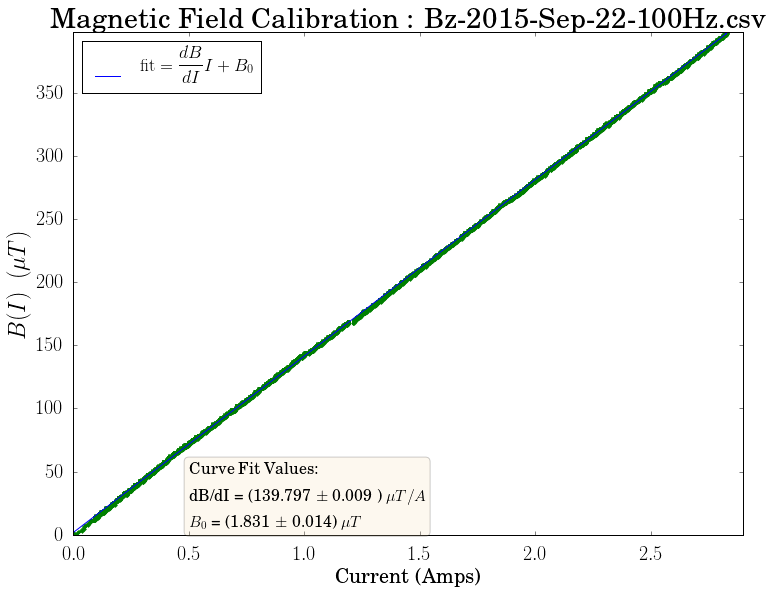

In [4]:
t, current, b1, b2, b3, bAverage = ComputeCalibration(fileName, True)

## Y axis coils (square)

[ 47.70061963   1.00173949] [ 0.0067111   0.00844251]


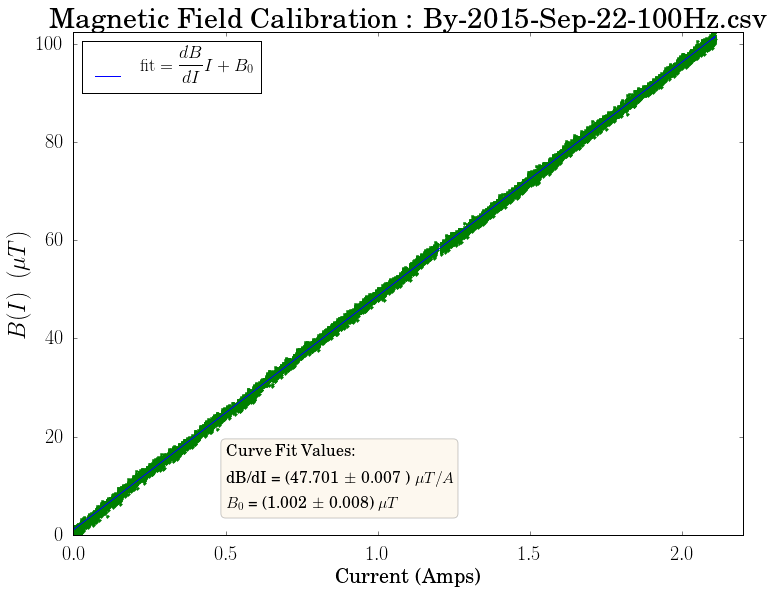

In [5]:
fileName = 'By-2015-Sep-22-100Hz.csv'
t, current, b1, b2, b3, bAverage = ComputeCalibration(fileName, True)

## X  axis coils (square)

I've done several runs here at different sampling rates; see comments before each plot.
First plot: 100 Hz stepped by 10 mA manually

[ 44.69795459   0.24266618] [ 0.00726629  0.00652059]


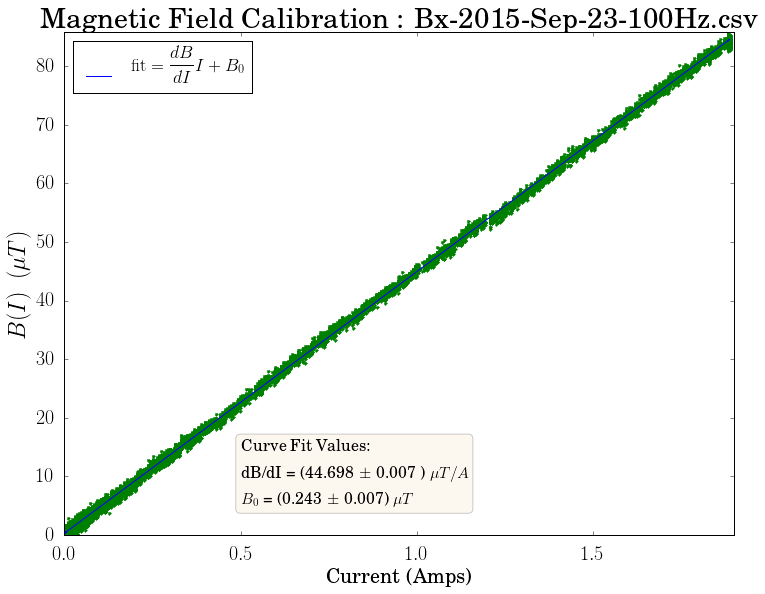

In [7]:
fileName = 'Bx-2015-Sep-23-100Hz.csv'
t, current, b1, b2, b3, bAverage = ComputeCalibration(fileName, True)

This run samples at 100Hz but with 100 mA current increases; again done manually by adjusting bk9110 Power Supply.

[ 43.97208962   0.71079676] [ 0.01303431  0.01401384]


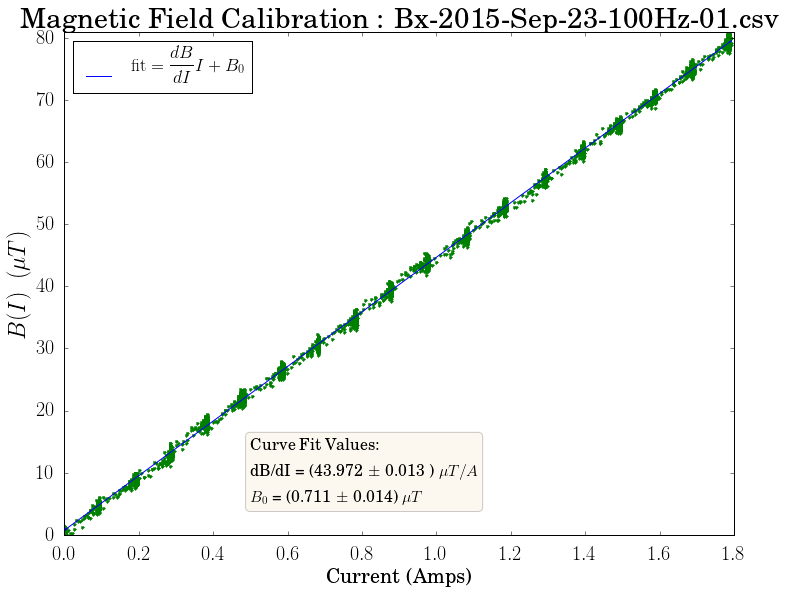

In [9]:
fileName = 'Bx-2015-Sep-23-100Hz-01.csv'
t, current, b1, b2, b3, bAverage = ComputeCalibration(fileName, True)

[ 44.4871225    0.85600614] [ 0.0098663   0.00961353]


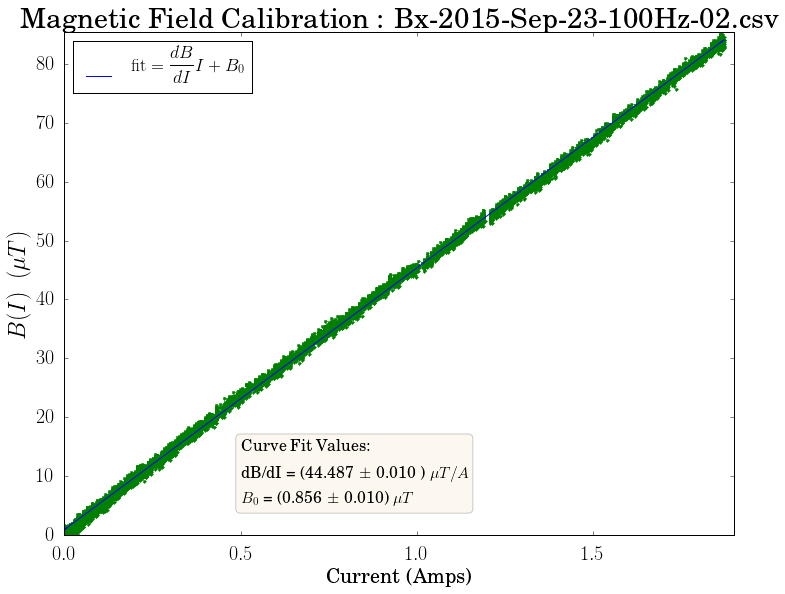

In [10]:
fileName = 'Bx-2015-Sep-23-100Hz-02.csv'
t, current, b1, b2, b3, bAverage = ComputeCalibration(fileName, True)

This run sampled at a frequency of 10Hz:

[ 44.41340812   0.64252288] [ 0.01549888  0.01444466]


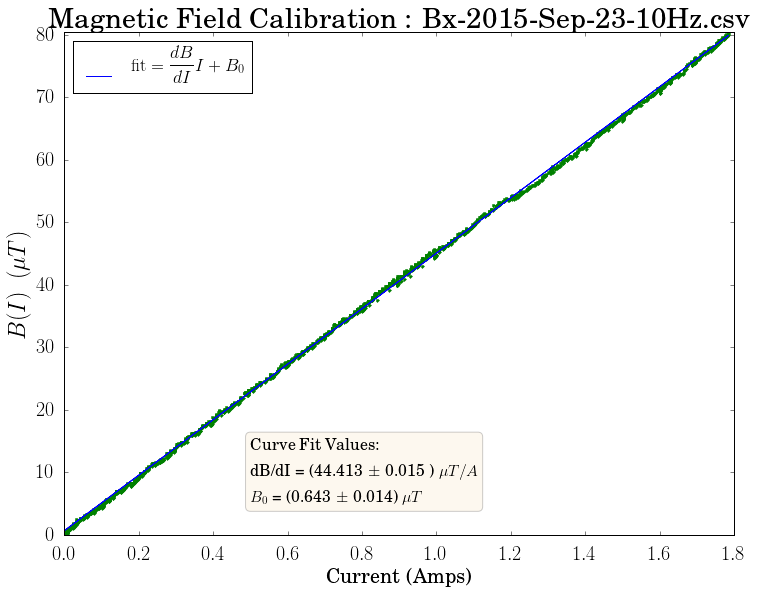

In [11]:
fileName = 'Bx-2015-Sep-23-10Hz.csv'
t, current, b1, b2, b3, bAverage = ComputeCalibration(fileName, True)

This run had a 0.1 $\mu$F capacitor across PS outputs.

[ 44.56474289   0.36908559] [ 0.01457369  0.01499267]


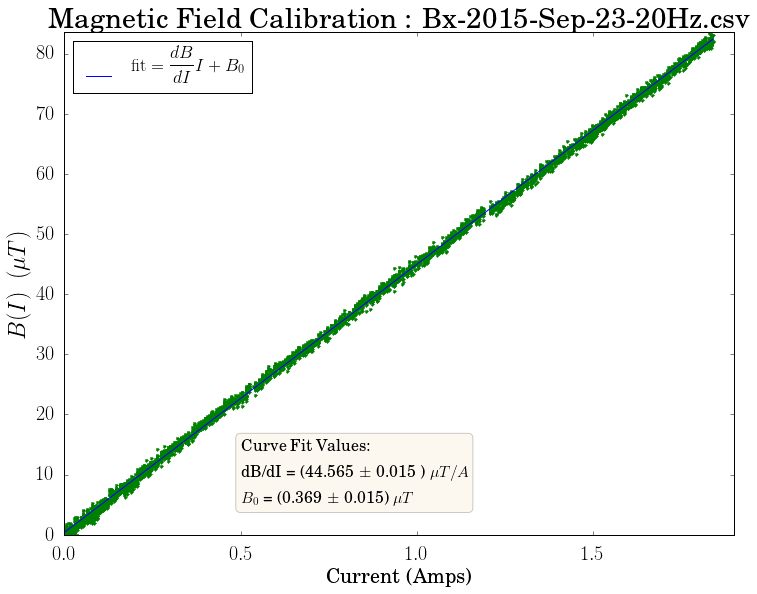

In [13]:
fileName = 'Bx-2015-Sep-23-20Hz.csv'
t, current, b1, b2, b3, bAverage = ComputeCalibration(fileName, True)

[ 44.0273969    1.08533806] [ 0.00815007  0.00798442]


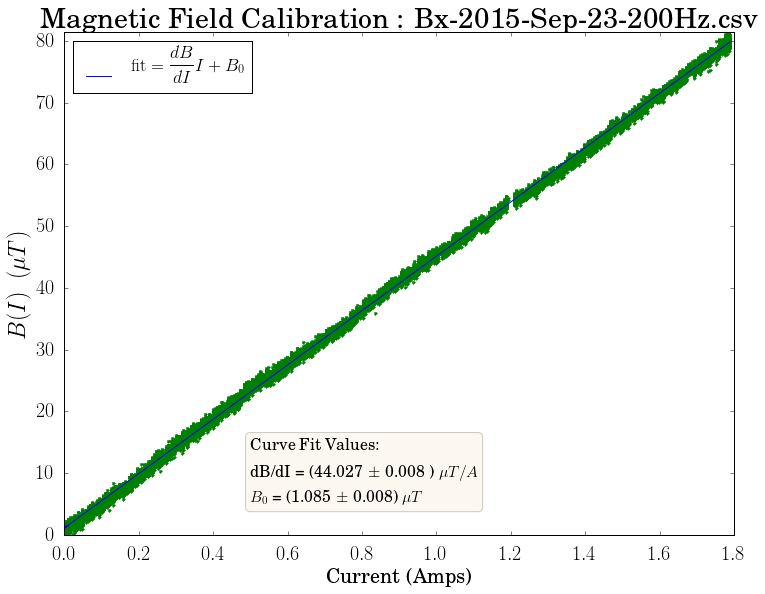

In [15]:
fileName = 'Bx-2015-Sep-23-200Hz.csv'
t, current, b1, b2, b3, bAverage = ComputeCalibration(fileName, True)